In [1]:
import random as rd
import numpy as np
import scipy as sp

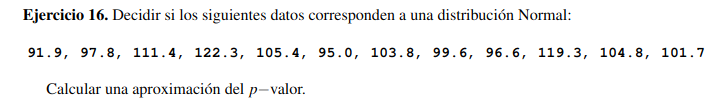

$$
H_0: \text{Los datos provienen de una distribucion aleatoria normal}
$$

In [2]:
muestra = np.array([91.9, 97.8, 111.4, 122.3, 105.4, 95.0, 103.8, 99.6, 96.6, 119.3, 104.8, 101.7], dtype=float)

Estimo $\mu$ y $\sigma$ con los datos y calculo el estadístico de prueba $D$:

In [3]:
print(f"Mu: {np.mean(muestra)}")
print(f"Sigma: {np.std(muestra)}")

Mu: 104.13333333333333
Sigma: 8.997345287484649


A partir de esta aproximación, calculo el estadistico de prueba usando F ~ N($\hat{\mu}$,$\hat{\sigma}$)

Luego genero una muestra de n valores de una normal con media $\hat{\mu}$ y desviación $\hat{\sigma}$ y vuelvo a calcular los parametros $\mu$ y $\sigma$ y el estadistico de prueba D.

In [4]:
def estadistico_K_S_norm(muestra, mu, sigma):
    muestra.sort()
    n = len(muestra)
    D = 0
    for i in range(n):
        F_yj = sp.stats.norm.cdf(muestra[i], mu, sigma)
        izq = ((i+1)/n) - F_yj
        der = F_yj - (i/n)
        D = max(D, izq, der)
    return D

def estadistico_K_S_uniform(data):
    data=np.sort(data) #Ordeno
    n=len(data)
    d=0
    for j in range(n):
        x=data[j]
        d=max(d ,((j+1)/n)-x , x - j/n)
    return d

In [9]:
def simular_pvalor(nsims, muestra):
    muestra.sort()
    n = len(muestra)
    mu = np.mean(muestra)
    sigma = np.std(muestra)
    D = estadistico_K_S_norm(muestra, mu, sigma)
    hits = 0
    mu_sim = 0
    sigma_sim = 0
    for _ in range(nsims):
        #muestra_sim = sp.stats.norm.rvs(loc=mu, scale=sigma, size=n)
        #mu_sim = np.mean(muestra_sim)
        #sigma_sim = np.std(muestra_sim)
        muestra_sim = np.random.uniform(0, 1, n)
        #D_sim = estadistico_K_S_norm(muestra_sim, mu_sim, sigma_sim)
        D_sim = estadistico_K_S_uniform(muestra_sim)
        if D_sim >= D:
            hits += 1
    return hits/nsims, mu_sim, sigma_sim

In [45]:
nsims = 10000
pvalor, mu_est, sigma_est = simular_pvalor(nsims, muestra)
print(f"P-valor: {pvalor}")
print(f"Mu_est: {mu_est}")
print(f"Sigma_est: {sigma_est}")

P-valor: 0.6979
Mu_est: 0
Sigma_est: 0


In [51]:
print(sp.stats.kstest(muestra, 'norm', args=(np.mean(muestra), np.std(muestra))))

KstestResult(statistic=0.19402097620229442, pvalue=0.688710117674284, statistic_location=105.4, statistic_sign=1)
